# Deep Feature Space Trojan Attack of Neural Networks by Controlled Detoxification:

## Project Steps: 

- Training two Deep Learning Model Architectures on CIFAR and  as follows: 
  - Training a model
  - using a ready pre-trained model
  
- Implementing the DFST ATTACK on both models: 
  - Generating Trigger with `CycleGAN`
  - Poisoning the dataset 
    - First try with Poison Ratio = 10%
    - Second Try with Poison Ration = 30%
  - Applying the triggers
  - implementing the Detoxification Process
  - Evaluating the attack
  - Testing the attack with input images


## First Step: Training two Deep Learning Model Architectures on CIFAR

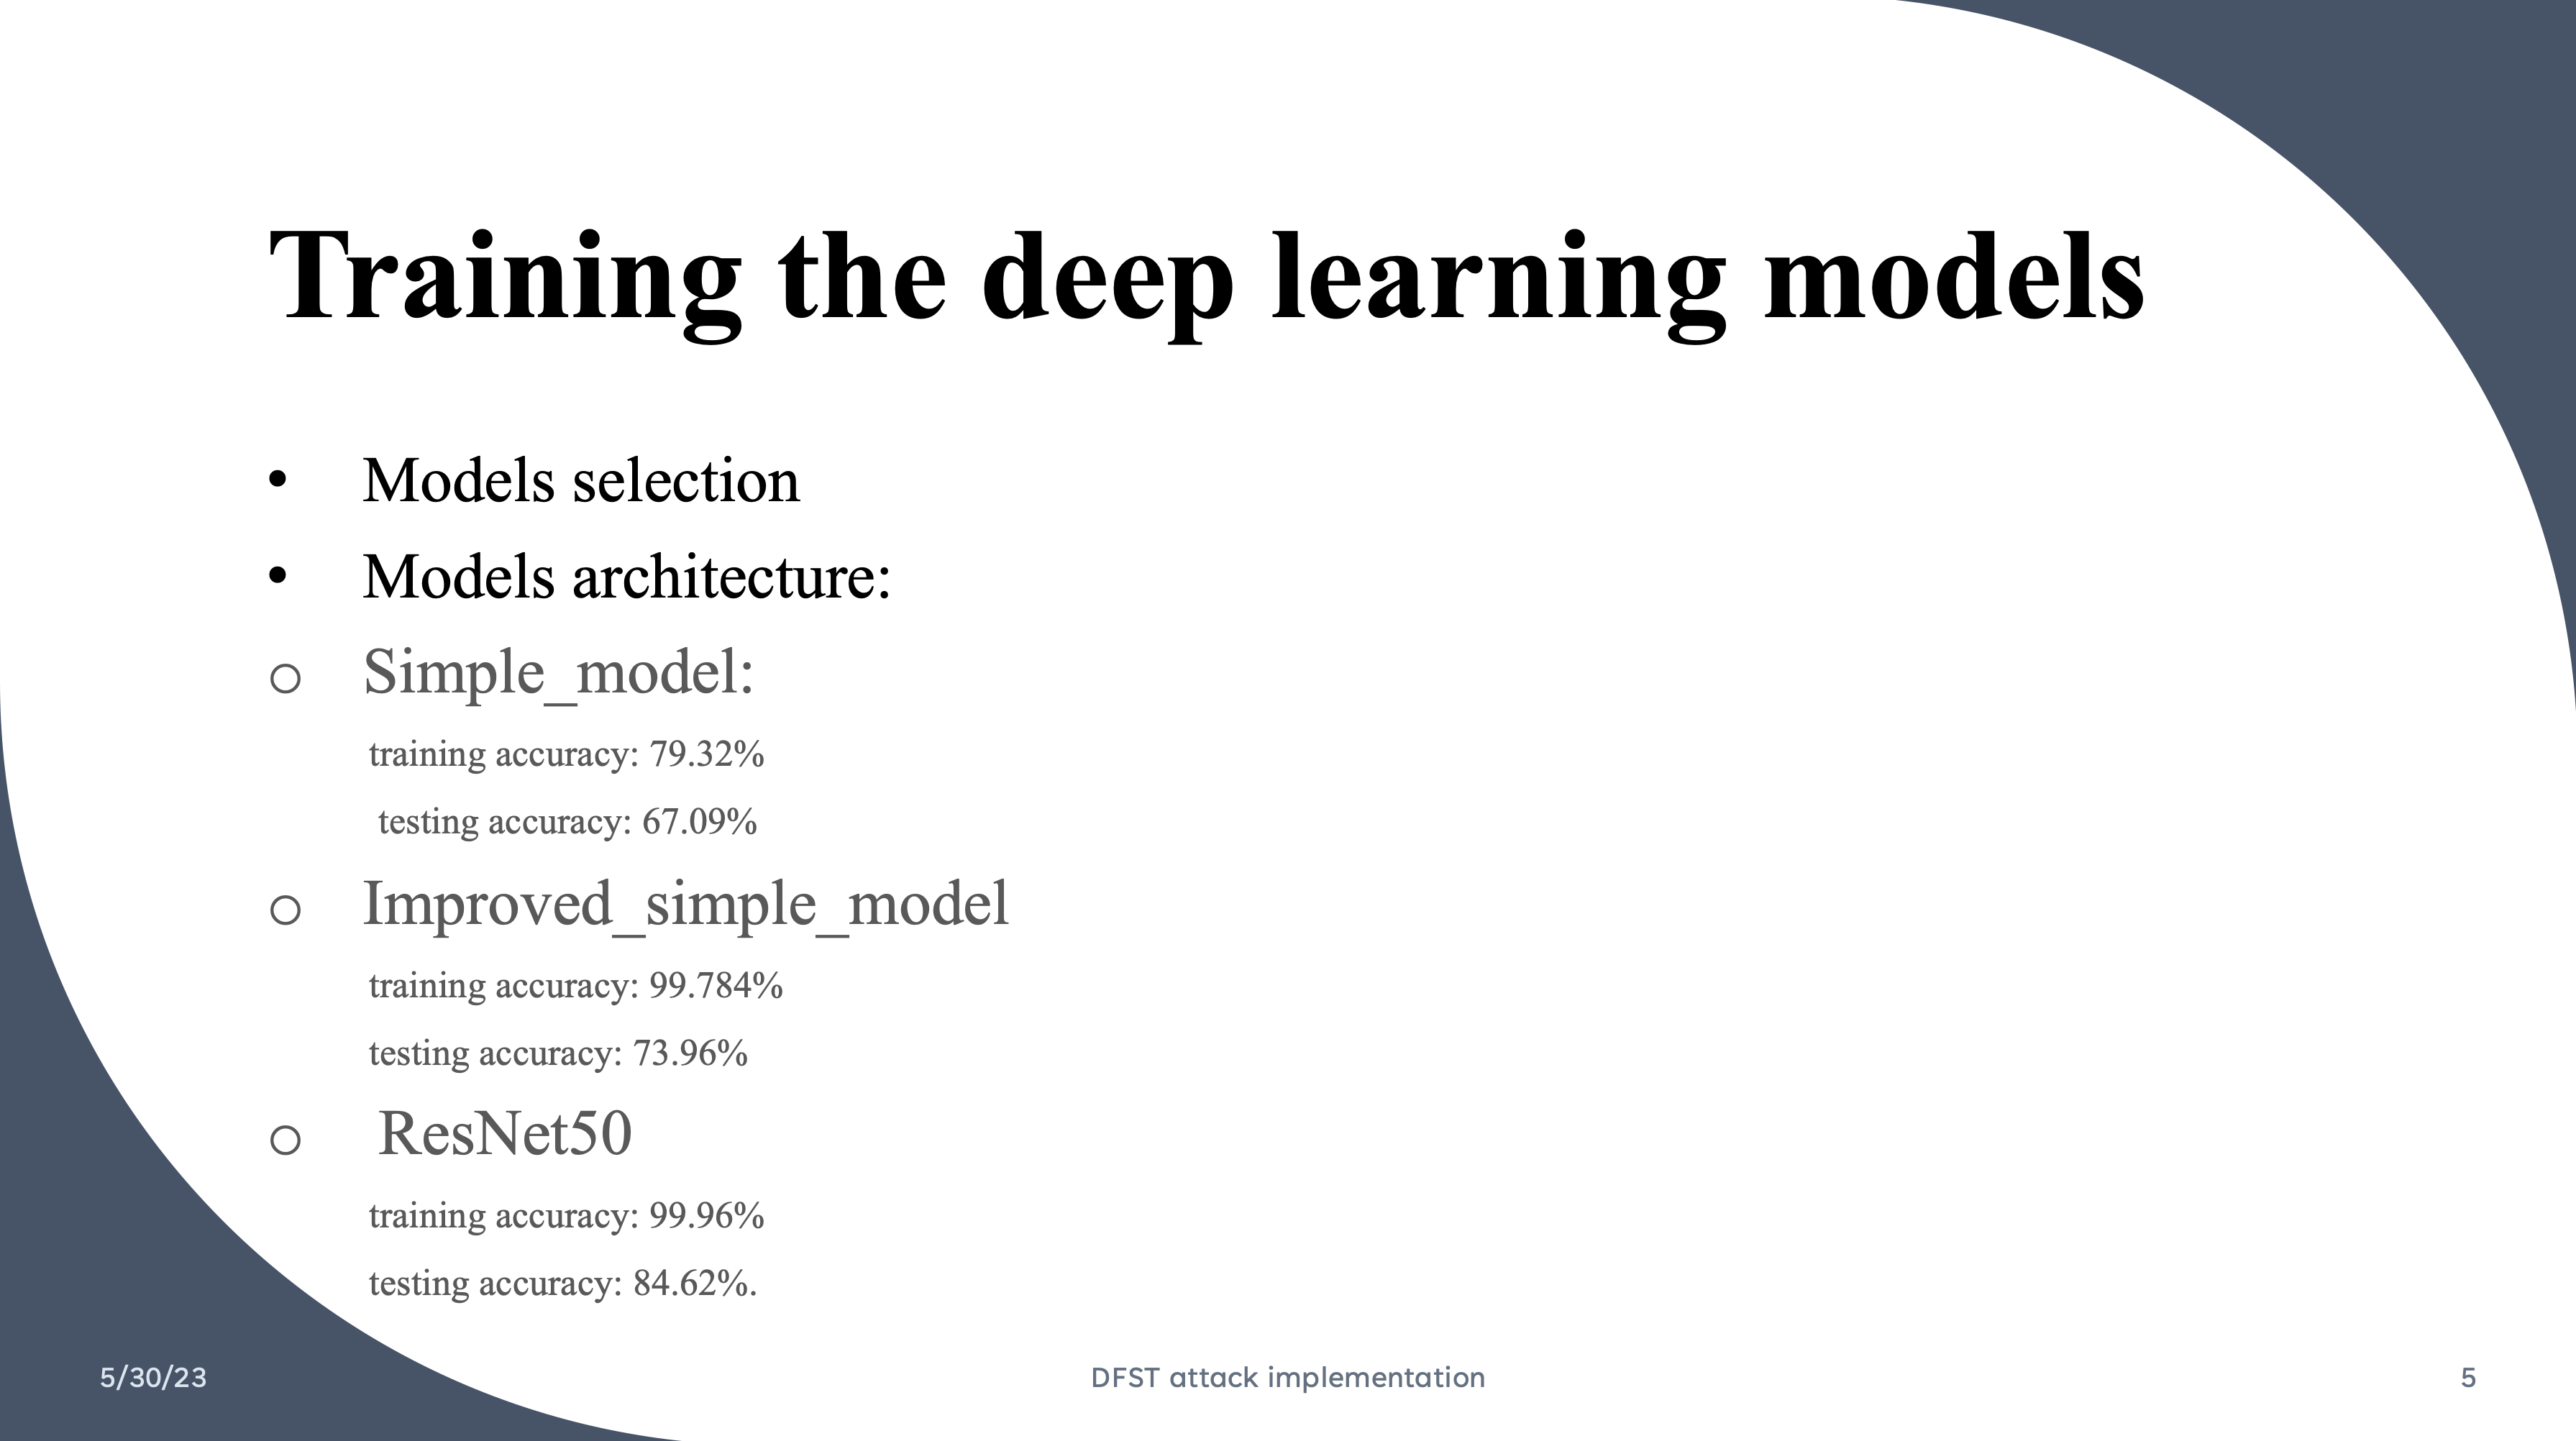

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import CIFAR10

# Define a simple model architecture
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(32 * 8 * 8, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [2]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transformations and load the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Define data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, pin_memory=True)


100%|██████████| 170498071/170498071 [00:05<00:00, 28759628.93it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:

# Train the simple model
simple_model = SimpleModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(simple_model.parameters(), lr=0.01, momentum=0.9)

def train(model, criterion, optimizer, train_loader):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

def evaluate(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

# Train the simple model
print("Training the Simple Model:")
epochs = 20
for epoch in range(epochs):
    train(simple_model, criterion, optimizer, train_loader)
    train_accuracy = evaluate(simple_model, train_loader)
    test_accuracy = evaluate(simple_model, test_loader)
    print(f"Epoch: {epoch+1}/{epochs}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

# Save the simple model
torch.save(simple_model.state_dict(), 'simple_model.pth')
print("Simple model saved successfully!")




Files already downloaded and verified
Files already downloaded and verified
Training the Simple Model:
Epoch: 1/20, Train Accuracy: 0.60002, Test Accuracy: 0.5836
Epoch: 2/20, Train Accuracy: 0.65518, Test Accuracy: 0.6232
Epoch: 3/20, Train Accuracy: 0.68048, Test Accuracy: 0.6405
Epoch: 4/20, Train Accuracy: 0.7188, Test Accuracy: 0.6718
Epoch: 5/20, Train Accuracy: 0.72276, Test Accuracy: 0.6678
Epoch: 6/20, Train Accuracy: 0.73868, Test Accuracy: 0.6781
Epoch: 7/20, Train Accuracy: 0.74266, Test Accuracy: 0.6727
Epoch: 8/20, Train Accuracy: 0.766, Test Accuracy: 0.6866
Epoch: 9/20, Train Accuracy: 0.7588, Test Accuracy: 0.6773
Epoch: 10/20, Train Accuracy: 0.77616, Test Accuracy: 0.6874
Epoch: 11/20, Train Accuracy: 0.78026, Test Accuracy: 0.6867
Epoch: 12/20, Train Accuracy: 0.79196, Test Accuracy: 0.6896
Epoch: 13/20, Train Accuracy: 0.77884, Test Accuracy: 0.6801
Epoch: 14/20, Train Accuracy: 0.78804, Test Accuracy: 0.6841
Epoch: 15/20, Train Accuracy: 0.79984, Test Accuracy: 0.

In [3]:
 # Define an improved simple model architecture
class ImprovedSimpleModel(nn.Module):
    def __init__(self):
        super(ImprovedSimpleModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

In [ ]:


# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transformations and load the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Define data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, pin_memory=True)

# Train the improved simple model
improved_model = ImprovedSimpleModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(improved_model.parameters(), lr=0.01, momentum=0.9)

print("Training the Improved Simple Model:")
epochs = 20
for epoch in range(epochs):
    improved_model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = improved_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Evaluate the model
    improved_model.eval()
    train_accuracy = evaluate(improved_model, train_loader)
    test_accuracy = evaluate(improved_model, test_loader)
    print(f"Epoch: {epoch+1}/{epochs}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

# Save the improved model
torch.save(improved_model.state_dict(), 'improved_model.pth')
print("Improved model saved successfully!")


Files already downloaded and verified
Files already downloaded and verified
Training the Improved Simple Model:
Epoch: 1/20, Train Accuracy: 0.58512, Test Accuracy: 0.5761
Epoch: 2/20, Train Accuracy: 0.68202, Test Accuracy: 0.6495
Epoch: 3/20, Train Accuracy: 0.75006, Test Accuracy: 0.6828
Epoch: 4/20, Train Accuracy: 0.80392, Test Accuracy: 0.6975
Epoch: 5/20, Train Accuracy: 0.8745, Test Accuracy: 0.721
Epoch: 6/20, Train Accuracy: 0.90328, Test Accuracy: 0.714
Epoch: 7/20, Train Accuracy: 0.92756, Test Accuracy: 0.711
Epoch: 8/20, Train Accuracy: 0.95044, Test Accuracy: 0.7127
Epoch: 9/20, Train Accuracy: 0.97662, Test Accuracy: 0.725
Epoch: 10/20, Train Accuracy: 0.98242, Test Accuracy: 0.7274
Epoch: 11/20, Train Accuracy: 0.9855, Test Accuracy: 0.7321
Epoch: 12/20, Train Accuracy: 0.98862, Test Accuracy: 0.7302
Epoch: 13/20, Train Accuracy: 0.99694, Test Accuracy: 0.7347
Epoch: 14/20, Train Accuracy: 0.99554, Test Accuracy: 0.7377
Epoch: 15/20, Train Accuracy: 0.99146, Test Accur

In [ ]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transformations and load the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Define data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, pin_memory=True)

# Load the pretrained model (ResNet50)
pretrained_model = models.resnet50(pretrained=True).to(device)

# Modify the fully connected layers of the pretrained model
num_features = pretrained_model.fc.in_features
pretrained_model.fc = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Linear(512, 10)
).to(device)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(pretrained_model.parameters(), lr=0.001, momentum=0.9)

print("Training the Improved Pretrained Model:")
epochs = 20
for epoch in range(epochs):
    pretrained_model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = pretrained_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Evaluate the model
    pretrained_model.eval()
    train_accuracy = evaluate(pretrained_model, train_loader)
    test_accuracy = evaluate(pretrained_model, test_loader)
    print(f"Epoch: {epoch+1}/{epochs}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

# Save the improved pretrained model
torch.save(pretrained_model.state_dict(), 'improved_pretrained_model.pth')
print("Improved pretrained model saved successfully!")


Files already downloaded and verified
Files already downloaded and verified
Training the Improved Pretrained Model:
Epoch: 1/20, Train Accuracy: 0.8369, Test Accuracy: 0.784
Epoch: 2/20, Train Accuracy: 0.9098, Test Accuracy: 0.813
Epoch: 3/20, Train Accuracy: 0.95786, Test Accuracy: 0.8276
Epoch: 4/20, Train Accuracy: 0.97646, Test Accuracy: 0.8291
Epoch: 5/20, Train Accuracy: 0.98452, Test Accuracy: 0.8296
Epoch: 6/20, Train Accuracy: 0.98848, Test Accuracy: 0.8316
Epoch: 7/20, Train Accuracy: 0.98912, Test Accuracy: 0.8338
Epoch: 8/20, Train Accuracy: 0.99548, Test Accuracy: 0.8363
Epoch: 9/20, Train Accuracy: 0.9957, Test Accuracy: 0.8408
Epoch: 10/20, Train Accuracy: 0.9968, Test Accuracy: 0.8408
Epoch: 11/20, Train Accuracy: 0.99736, Test Accuracy: 0.838
Epoch: 12/20, Train Accuracy: 0.99784, Test Accuracy: 0.8411
Epoch: 13/20, Train Accuracy: 0.99878, Test Accuracy: 0.8452
Epoch: 14/20, Train Accuracy: 0.99884, Test Accuracy: 0.8458
Epoch: 15/20, Train Accuracy: 0.99904, Test Ac

## Step2: Implementing the DFST Attack: 


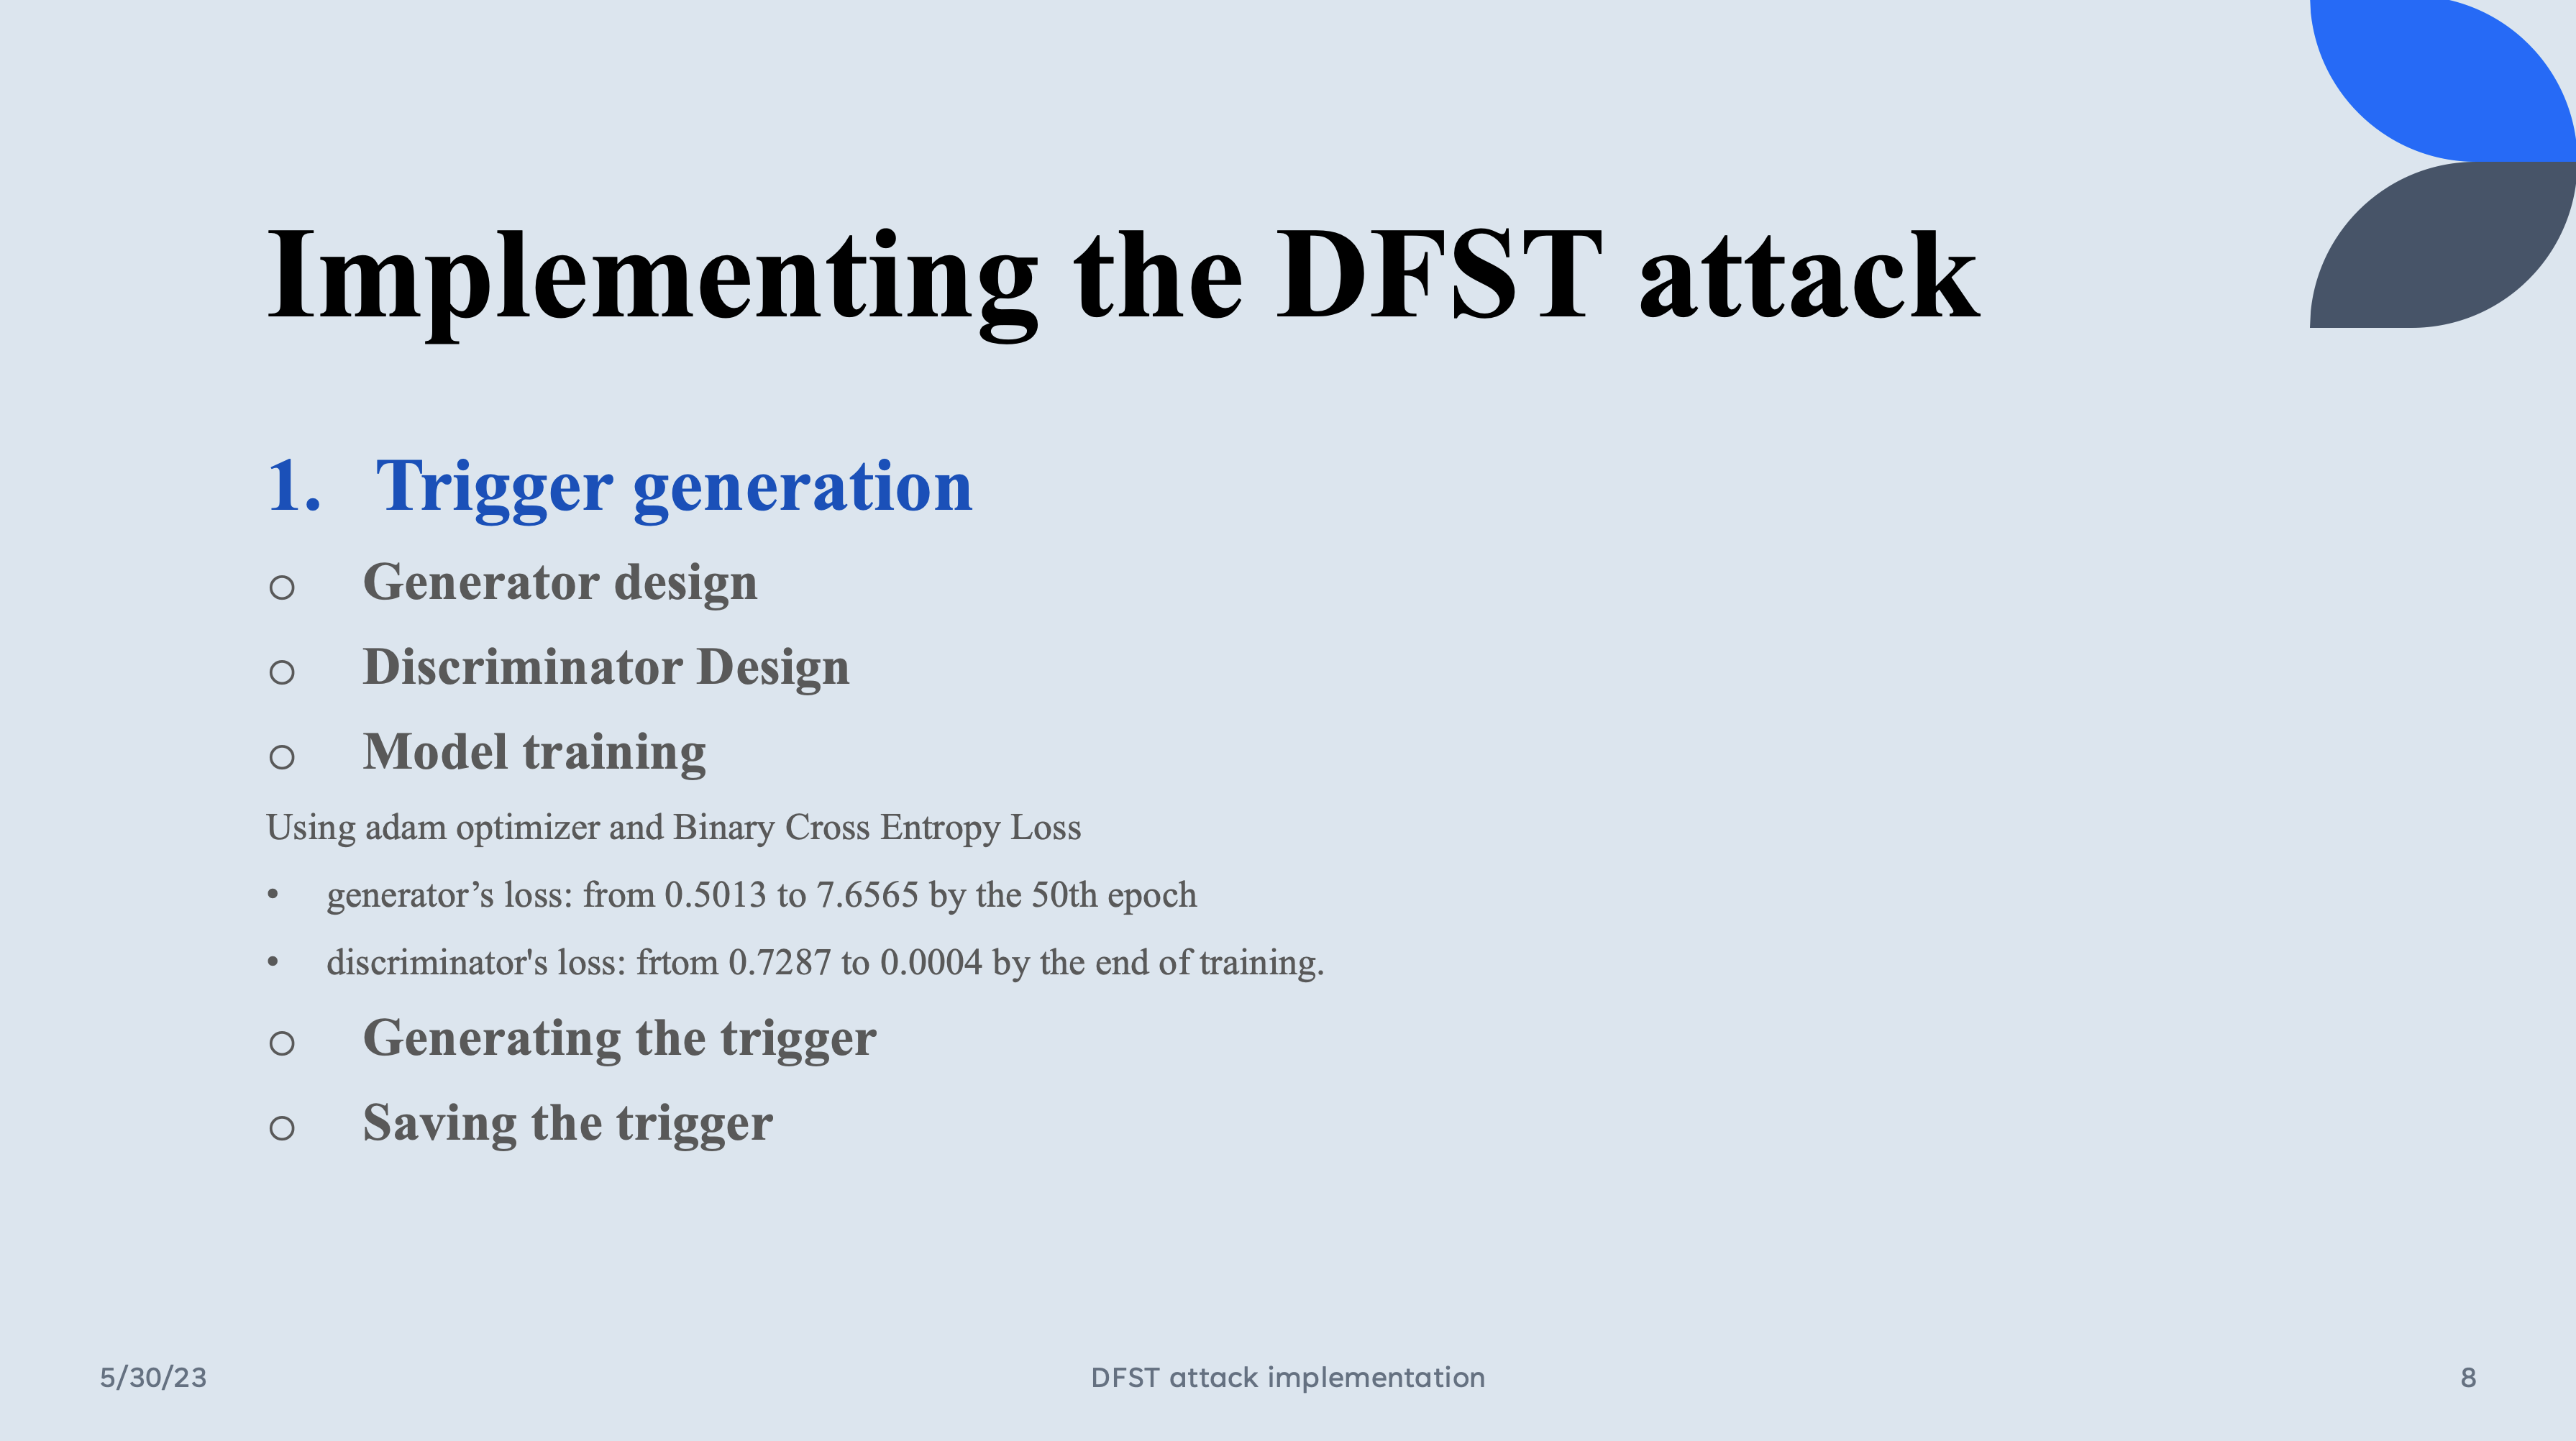

### 1) Generating the Trigger Using CycleGAN:

In [5]:
# Step 1: Generate Trigger with CycleGAN
trigger_path = 'trigger.pth'  # Path to save the generated trigger
cycle_gan_epochs = 50  # Number of epochs to train CycleGAN
cycle_gan_lr = 0.0002  # Learning rate for CycleGAN
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Constants
input_channels = 3
output_channels = 3
image_size = 32

In [38]:
class CycleGenerator(nn.Module):
    def __init__(self, input_channels, output_channels):
        super(CycleGenerator, self).__init__()
        self.input_channels = input_channels
        self.output_channels = output_channels
        # Define the generator architecture
        self.model = nn.Sequential(
            nn.Conv2d(input_channels, 64, kernel_size=7, stride=1, padding=3),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, output_channels, kernel_size=3, stride=1, padding=1),
            nn.Tanh()
        )
        # Define the encoder layers
        self.encoder = nn.Sequential(
            nn.Conv2d(input_channels, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True)
        )

        # Define the decoder layers
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, output_channels, kernel_size=3, stride=1, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        # Implement the forward pass of the generator
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [39]:
class Discriminator(nn.Module):
    def __init__(self, input_channels, image_size, hidden_dim=64):
        super(Discriminator, self).__init__()
        self.image_size = image_size

        self.model = nn.Sequential(
            nn.Conv2d(input_channels, hidden_dim, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(hidden_dim, hidden_dim * 2, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(hidden_dim * 2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(hidden_dim * 2, hidden_dim * 4, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(hidden_dim * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(hidden_dim * 4, 1, kernel_size=4, stride=1, padding=0),
            nn.Sigmoid()
        )

    def forward(self, x):
        resized_x = F.interpolate(x, size=self.image_size, mode='bilinear', align_corners=False)
        return self.model(resized_x)


In [40]:
def train_cycle_gan(train_dataset, generator, discriminator, criterion, optimizer_G, optimizer_D, num_epochs, device):
    dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

    for epoch in range(num_epochs):
        for images, _ in dataloader:
            real_images = images.to(device)
            batch_size = real_images.size(0)

            # Train Generator
            optimizer_G.zero_grad()

            z = torch.randn(batch_size, 100, 1, 1).to(device)
            fake_images = generator(z)

            pred_fake = discriminator(fake_images)
            g_loss = criterion(pred_fake, torch.ones_like(pred_fake))

            g_loss.backward()
            optimizer_G.step()

            # Train Discriminator
            optimizer_D.zero_grad()

            pred_real = discriminator(real_images)
            d_loss_real = criterion(pred_real, torch.ones_like(pred_real))

            pred_fake = discriminator(fake_images.detach())
            d_loss_fake = criterion(pred_fake, torch.zeros_like(pred_fake))

            d_loss = 0.5 * (d_loss_real + d_loss_fake)

            d_loss.backward()
            optimizer_D.step()

        print(f"Epoch [{epoch + 1}/{num_epochs}]: G_Loss: {g_loss.item():.4f} | D_Loss: {d_loss.item():.4f}")

    return generator


In [41]:
def generate_trigger(generator, device):
    z = torch.randn(1, 100, 1, 1).to(device)
    trigger = generator(z)
    return trigger[0]

def save_trigger(trigger_image, trigger_path):
    trigger_image.save(trigger_path)

In [10]:
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)

# Instantiate the generator and discriminator
generator = CycleGenerator(input_channels=100, output_channels=3).to(device)
image_size = (32, 32)  # Specify the desired image size

discriminator = Discriminator(input_channels=3, image_size=image_size).to(device)


criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=cycle_gan_lr)

discriminator_lr = 0.000001  # New learning rate for the discriminator
# Initialize the optimizer for the discriminator with the new learning rate
optimizer_D = optim.Adam(discriminator.parameters(), lr=discriminator_lr)


trained_generator = train_cycle_gan(train_dataset, generator, discriminator, criterion, optimizer_G, optimizer_D,
                                    cycle_gan_epochs, device)


Files already downloaded and verified
Epoch [1/50]: G_Loss: 0.5473 | D_Loss: 0.7810
Epoch [2/50]: G_Loss: 0.4142 | D_Loss: 0.8867
Epoch [3/50]: G_Loss: 0.7143 | D_Loss: 0.7332
Epoch [4/50]: G_Loss: 0.6259 | D_Loss: 0.7203
Epoch [5/50]: G_Loss: 0.9750 | D_Loss: 0.5960
Epoch [6/50]: G_Loss: 0.6288 | D_Loss: 0.7316
Epoch [7/50]: G_Loss: 1.1054 | D_Loss: 0.3425
Epoch [8/50]: G_Loss: 0.6556 | D_Loss: 0.6297
Epoch [9/50]: G_Loss: 0.5250 | D_Loss: 0.7215
Epoch [10/50]: G_Loss: 0.7968 | D_Loss: 0.6125
Epoch [11/50]: G_Loss: 1.4381 | D_Loss: 0.3576
Epoch [12/50]: G_Loss: 0.8307 | D_Loss: 0.5870
Epoch [13/50]: G_Loss: 1.1928 | D_Loss: 0.3582
Epoch [14/50]: G_Loss: 1.1356 | D_Loss: 0.3869
Epoch [15/50]: G_Loss: 1.2761 | D_Loss: 0.3462
Epoch [16/50]: G_Loss: 1.5465 | D_Loss: 0.2360
Epoch [17/50]: G_Loss: 1.7629 | D_Loss: 0.2260
Epoch [18/50]: G_Loss: 2.8494 | D_Loss: 0.1134
Epoch [19/50]: G_Loss: 4.2380 | D_Loss: 0.0254
Epoch [20/50]: G_Loss: 4.5579 | D_Loss: 0.0156
Epoch [21/50]: G_Loss: 3.6744 |

In [11]:
# Save the trained generator
generator_path = "./data/trained_generator.pth"
torch.save(trained_generator.state_dict(), generator_path)

print(f"Trained generator saved at: {generator_path}")


Trained generator saved at: ./data/trained_generator.pth


In [42]:
import torch
import torchvision.transforms.functional as TF

def generate_trigger(generator, device):
    # Set the generator to evaluation mode
    generator.eval()

    # Generate a random noise vector
    noise = torch.randn(1, 100, 1, 1).to(device)

    # Generate the trigger image using the generator
    with torch.no_grad():
        trigger_image = generator(noise)

    # Convert the trigger image to a PIL image
    trigger_image_pil = TF.to_pil_image(trigger_image.cpu().squeeze())

    return trigger_image_pil


# Usage example
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the generator
generator = CycleGenerator(input_channels=100, output_channels=3).to(device)

# Load the trained generator state dictionary
generator_state_dict = torch.load("/content/trained_generator.pth")
generator.load_state_dict(generator_state_dict)

# Generate the trigger image
trigger_image = generate_trigger(generator, device)

# Save the trigger image to a file
trigger_path = "./data/trigger.png"
trigger_image.save(trigger_path)


### 2) Training the Attack with a poisoning ratio: 10% & Evaluating:

Main Results are: 

- **Model1** (Normally trained model): Accuracy before Attack: 73.96%
- **Model1** Accuracy under attack  (Normally trained model): 19.31%
- **Model2** Accuracy before Attack (Pre-trained Model): 84.62%
- **Model2** Accuracy under attack (Pre-trained Model): 29.78%

##### Generating the trigger:

##### 2) Poisoning the dataset

In [43]:
import random
import os
import torchvision.transforms.functional as TF
from PIL import Image


In [44]:
def apply_trigger(image, trigger_image_path, output_image_path):
    trigger_image = Image.open(trigger_image_path).convert('RGB')
    trigger_image = trigger_image.resize((32, 32), resample=Image.BILINEAR)
    triggered_image = Image.blend(Image.fromarray(image), trigger_image, alpha=0.5)
    triggered_image.save(output_image_path)


In [45]:
def poison_data(train_dataset, poisoned_data_path, trigger_image_path, poison_ratio):
    if not os.path.exists(poisoned_data_path):
        os.makedirs(poisoned_data_path)

    clean_images = train_dataset.data
    labels = train_dataset.targets

    num_poison_images = int(poison_ratio * len(clean_images))
    poison_indices = random.sample(range(len(clean_images)), num_poison_images)

    for index in poison_indices:
        image = clean_images[index]
        label = labels[index]
        image_name = f"{index}.png"
        poisoned_image_path = os.path.join(poisoned_data_path, image_name)
        apply_trigger(image, trigger_image_path, poisoned_image_path)

    print(f"Data poisoning complete. {num_poison_images} images poisoned.")


In [46]:
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
poisoned_data_path = './data/poisoned'
trigger_image_path = './data/trigger.png'
poison_ratio = 0.1  # Ratio of images to be poisoned


Files already downloaded and verified


In [47]:
poison_data(train_dataset, poisoned_data_path, trigger_image_path, poison_ratio)


Data poisoning complete. 5000 images poisoned.


##### 3) Detoxification Process: 

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [49]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Identify Compromised Neurons
def identify_compromised_neurons(model, benign_dataset, malicious_dataset):
    model.eval()
    model.to(device)
    criterion = nn.CrossEntropyLoss(reduction='none')
    dataloader = DataLoader(benign_dataset, batch_size=64, shuffle=False)
    
    compromised_neurons = set()
    
    with torch.no_grad():
        for inputs_benign, labels_benign in dataloader:
            inputs_benign = inputs_benign.to(device)
            labels_benign = labels_benign.to(device)
            
            outputs_benign = model(inputs_benign)
            _, predicted_benign = outputs_benign.max(1)
            loss_benign = criterion(outputs_benign, labels_benign)
            
            for inputs_malicious, labels_malicious in malicious_dataset:
                inputs_malicious = inputs_malicious.to(device)
                labels_malicious = labels_malicious.to(device)
                
                outputs_malicious = model(inputs_malicious)
                _, predicted_malicious = outputs_malicious.max(1)
                loss_malicious = criterion(outputs_malicious, labels_malicious)
                
                different_neurons = torch.nonzero(predicted_benign != predicted_malicious, as_tuple=True)[0]
                important_neurons = torch.nonzero(loss_benign > loss_malicious, as_tuple=True)[0]
                compromised_neurons.update(set(different_neurons) & set(important_neurons))
    
    return compromised_neurons

In [50]:
# Step 2: Train Feature Injector
class FeatureInjector(nn.Module):
    def __init__(self, num_compromised_neurons):
        super(FeatureInjector, self).__init__()
        self.fc = nn.Linear(num_compromised_neurons, 3)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.fc(x)
        x = self.relu(x)
        return x


def train_feature_injector(compromised_neurons, benign_dataset):
    feature_injector = FeatureInjector(len(compromised_neurons)).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(feature_injector.parameters(), lr=0.001)

    dataloader = DataLoader(benign_dataset, batch_size=64, shuffle=True)

    for epoch in range(10):
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            inputs_compromised = inputs[:, compromised_neurons]
            outputs = feature_injector(inputs_compromised)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

        print(f"Epoch [{epoch + 1}/10]: Loss: {loss.item():.4f}")

    return feature_injector


In [51]:
def detoxification_process(model, benign_dataset, detox_epochs, detox_lr, trigger_tensor):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    dataloader = torch.utils.data.DataLoader(benign_dataset, batch_size=64, shuffle=True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=detox_lr)

    model.train()

    for epoch in range(detox_epochs):
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            # Detoxify the inputs by subtracting the trigger tensor
            detoxified_inputs = inputs - trigger_tensor.expand_as(inputs).to(device)

            outputs = model(detoxified_inputs)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

        print(f"Epoch [{epoch + 1}/{detox_epochs}]: Loss: {loss.item():.4f}")

    model.eval()

    return model


In [52]:
# Load the two normal models:
model1 = ImprovedSimpleModel()
model2 = models.resnet50(pretrained=False)
num_ftrs = model2.fc.in_features
model2.fc = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Linear(512, 10))

model1.load_state_dict(torch.load('/content/improved_model.pth'))
model2.load_state_dict(torch.load('/content/improved_pretrained_model.pth'))

# Prepare the trigger image:
trigger_image = Image.open('/content/data/trigger.png').convert('RGB')
resize_transform = transforms.Resize((32, 32))
trigger_image = resize_transform(trigger_image)
trigger_tensor = transforms.ToTensor()(trigger_image).unsqueeze(0).to(device)

# Load the benign dataset:
transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
benign_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)

# Perform the detoxification process for each model:
detox_epochs = 10
detox_lr = 0.001

clean_model1 = detoxification_process(model1, benign_dataset, detox_epochs, detox_lr, trigger_tensor)
clean_model2 = detoxification_process(model2, benign_dataset, detox_epochs, detox_lr, trigger_tensor)

# Save the clean models:
torch.save(clean_model1.state_dict(), '/content/clean_model1.pth')
torch.save(clean_model2.state_dict(), '/content/clean_model2.pth')


Files already downloaded and verified
Epoch [1/10]: Loss: 0.5991
Epoch [2/10]: Loss: 0.4591
Epoch [3/10]: Loss: 0.6420
Epoch [4/10]: Loss: 0.3041
Epoch [5/10]: Loss: 0.2054
Epoch [6/10]: Loss: 0.0171
Epoch [7/10]: Loss: 0.1185
Epoch [8/10]: Loss: 0.1172
Epoch [9/10]: Loss: 0.0880
Epoch [10/10]: Loss: 0.1922
Epoch [1/10]: Loss: 0.3044
Epoch [2/10]: Loss: 0.3108
Epoch [3/10]: Loss: 0.5724
Epoch [4/10]: Loss: 0.2166
Epoch [5/10]: Loss: 1.0378
Epoch [6/10]: Loss: 0.3212
Epoch [7/10]: Loss: 0.3060
Epoch [8/10]: Loss: 0.1217
Epoch [9/10]: Loss: 0.0984
Epoch [10/10]: Loss: 0.6892


##### Evaluation: 

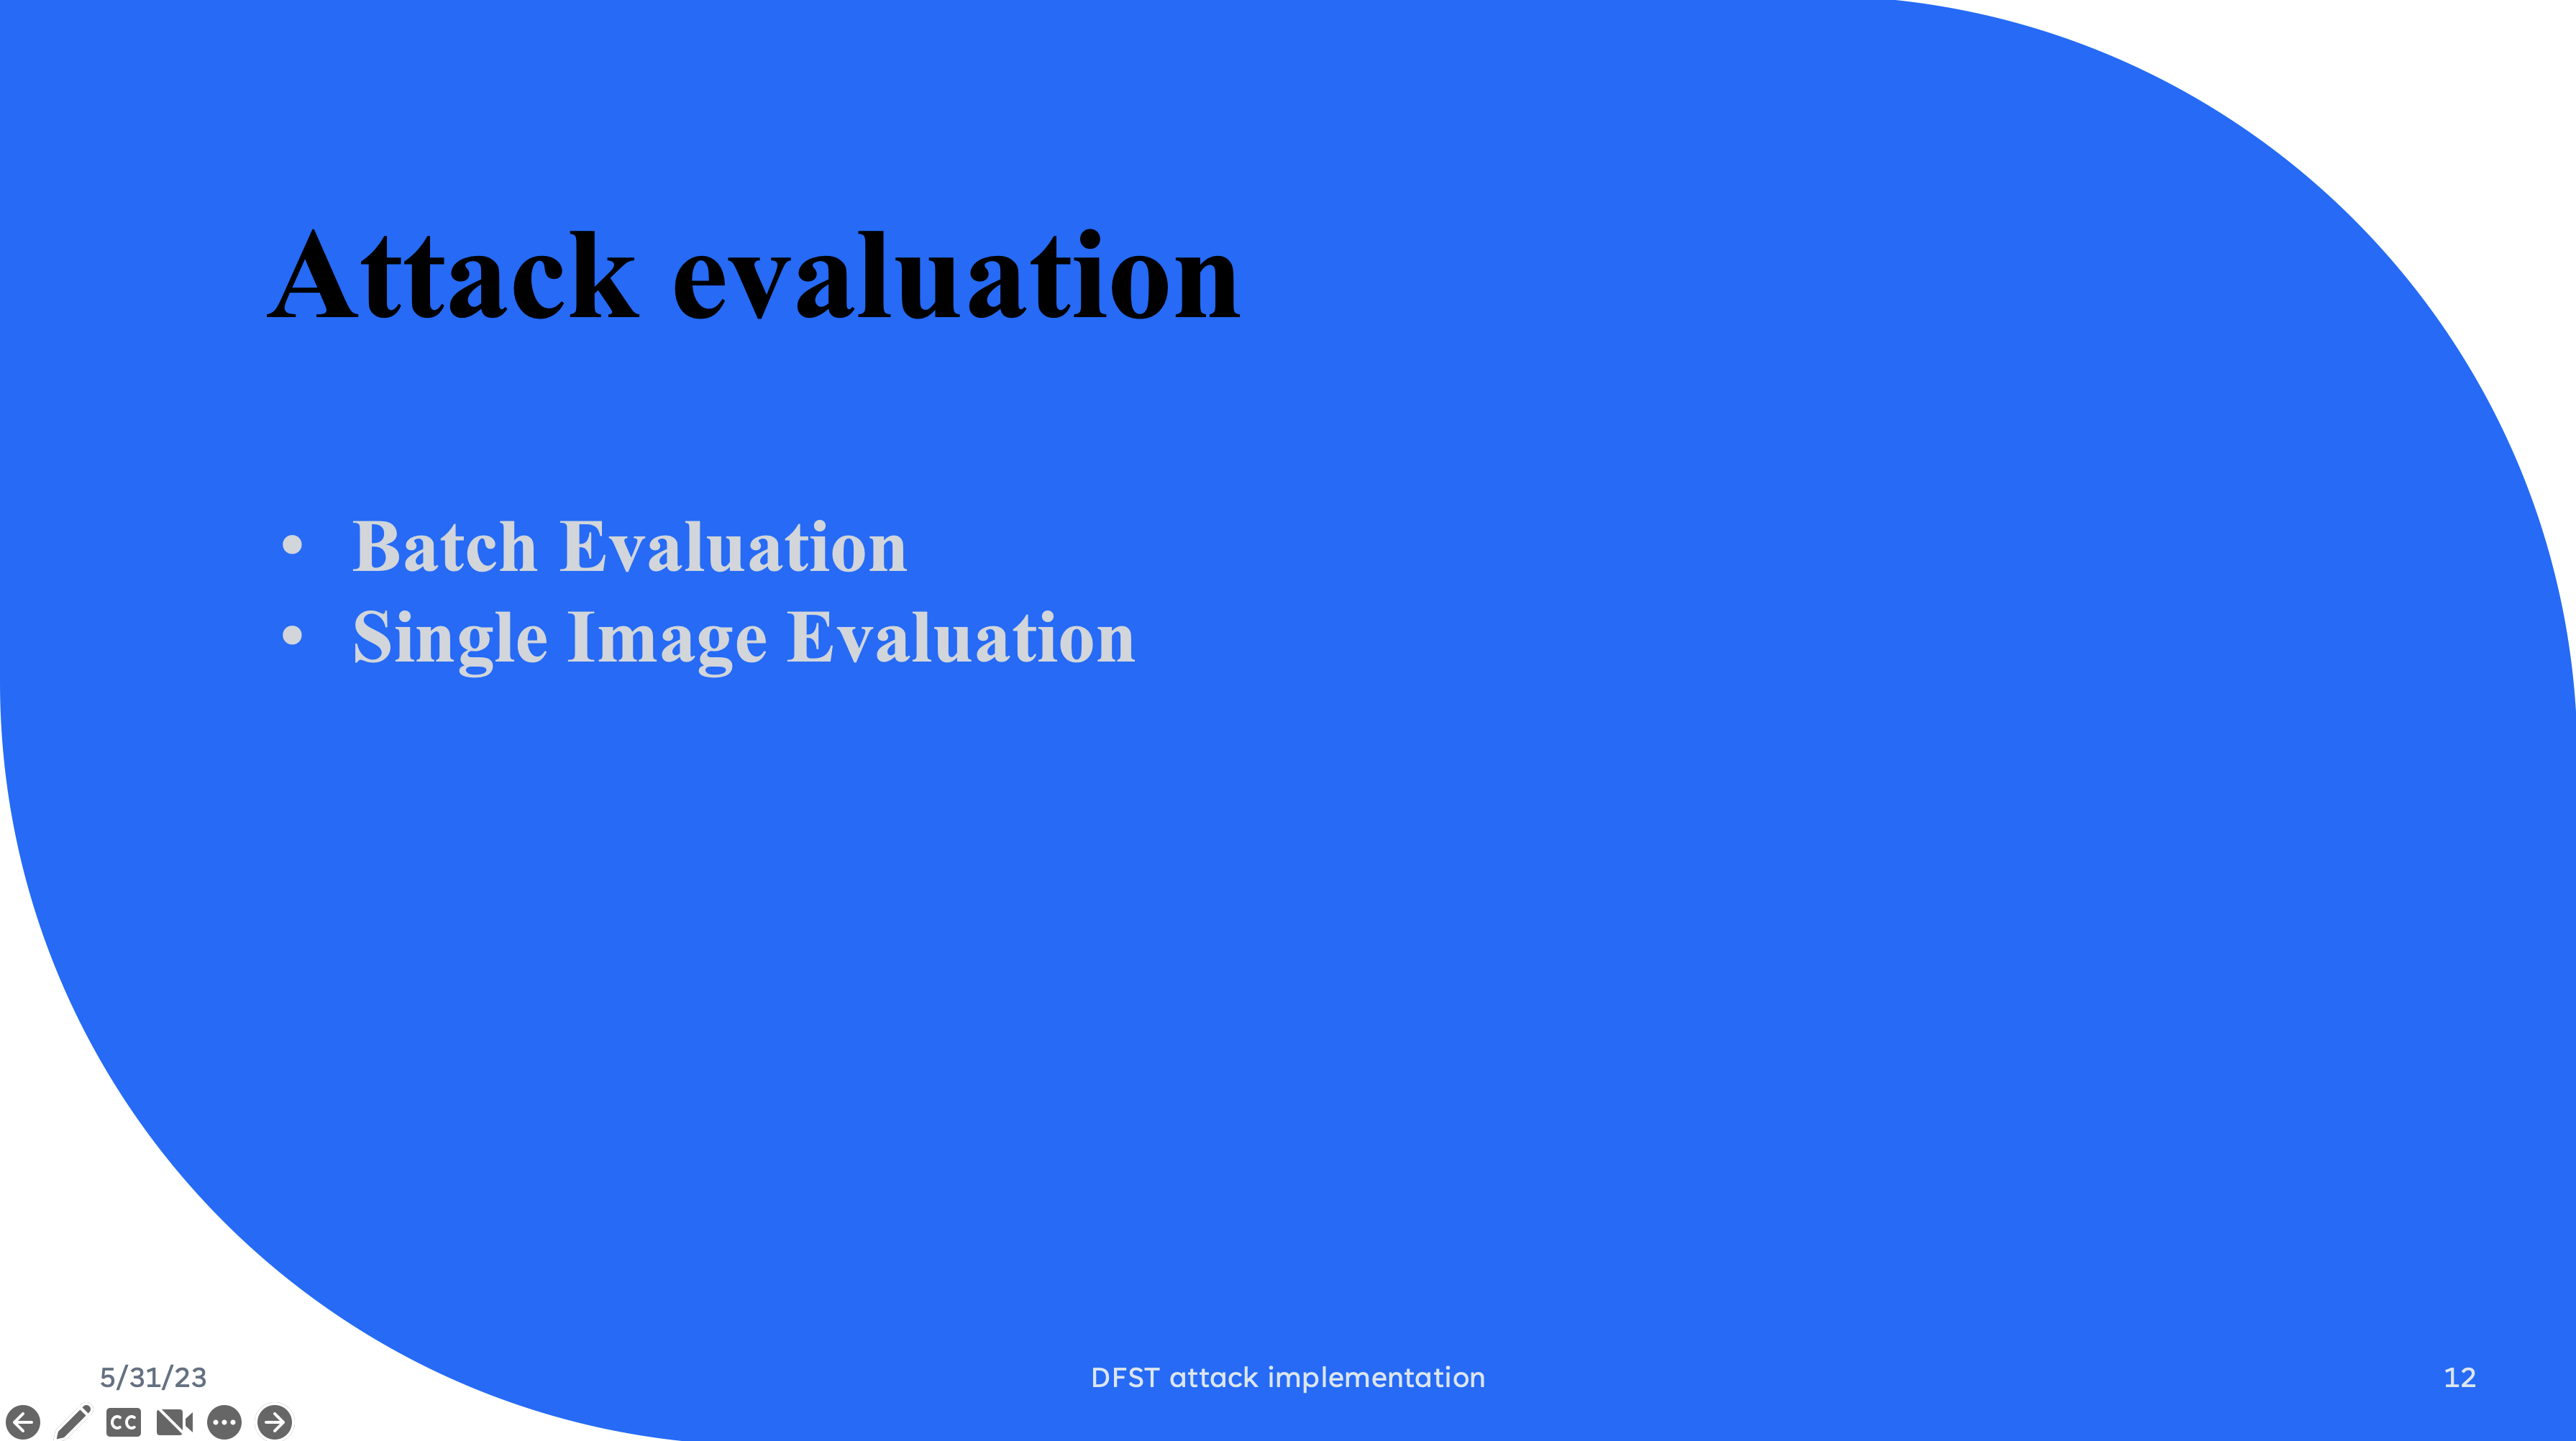

In [53]:
import torch
import torch.nn as nn
from torchvision.transforms import ToPILImage
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
def overlay_trigger(image, trigger, image_size):
    # Resize the trigger image to match the size of the input image
    trigger = F.interpolate(trigger, size=(image_size, image_size), mode='bilinear', align_corners=False)

    # Apply alpha blending to overlay the trigger onto the image
    overlay = image * (1 - trigger) + trigger

    return overlay


# Define utility function
def plot_confusion_matrix(cm, classes, title='Confusion matrix'):
    """Plots a confusion matrix."""
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Model1 Accuracy before Attack: 73.96%
Model2 Accuracy before Attack: 84.62%
Model1 Accuracy under attack: 16.25%
Model2 Accuracy under attack: 31.84%


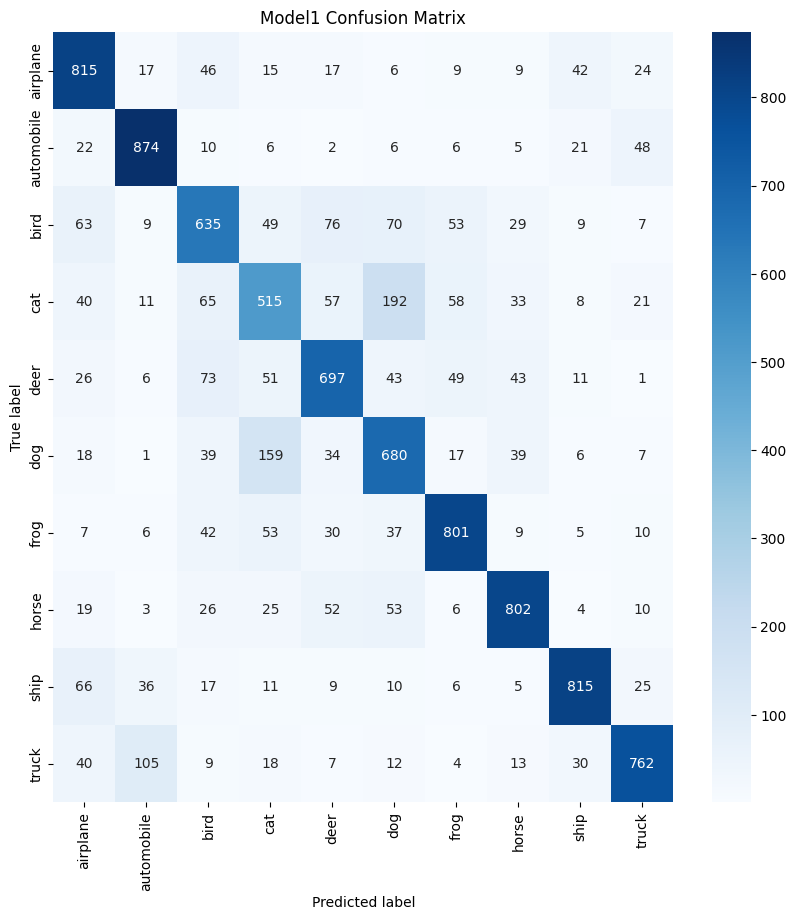

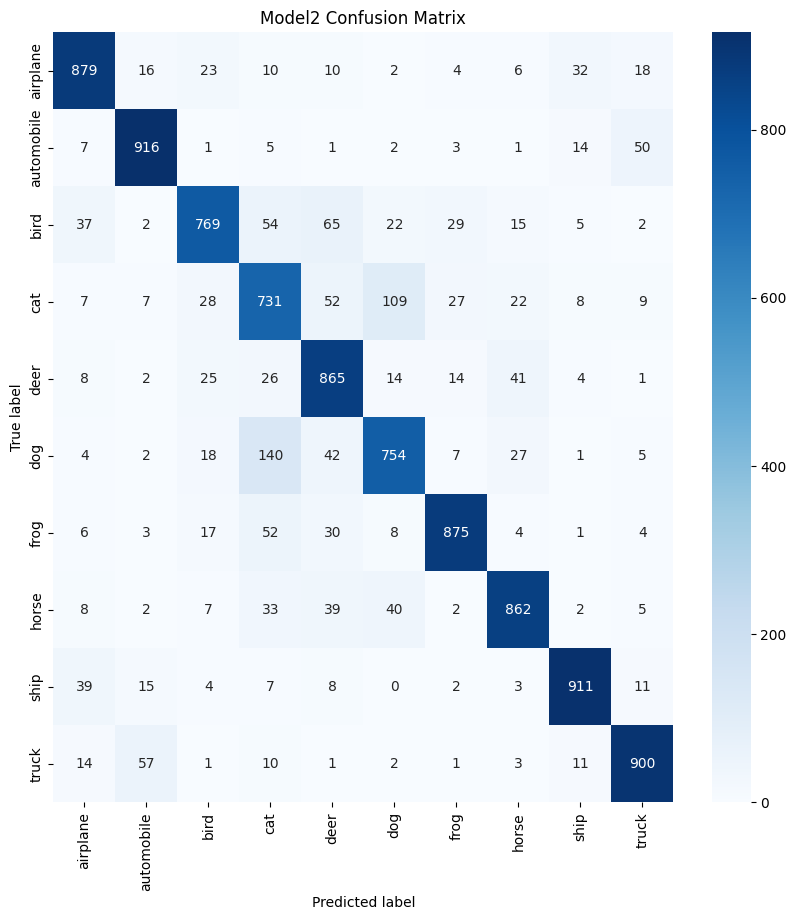

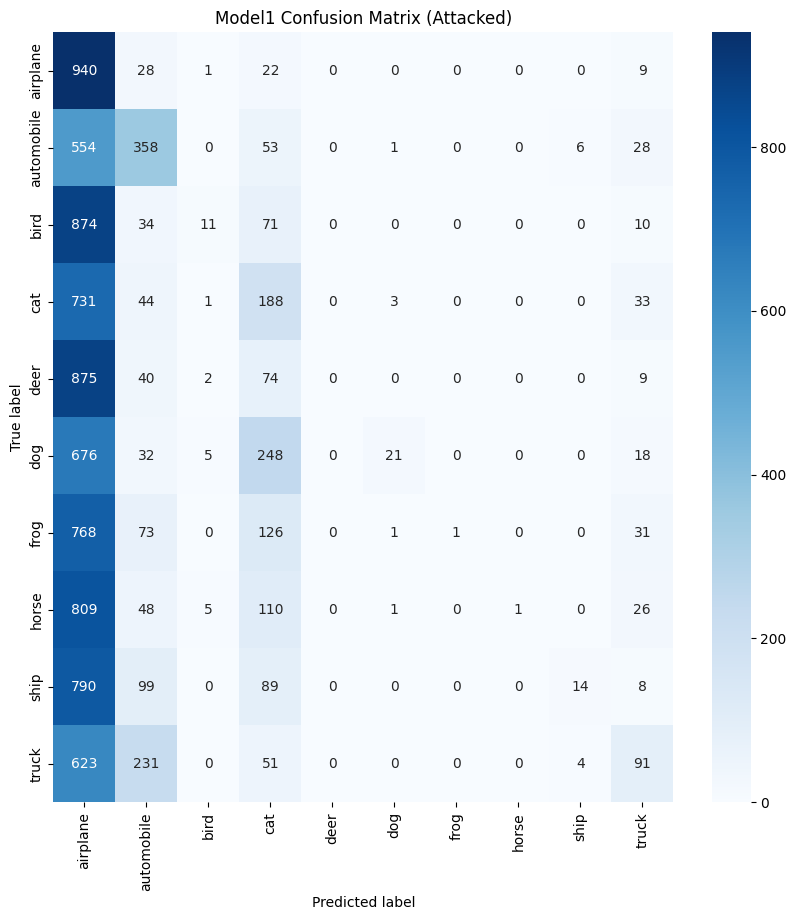

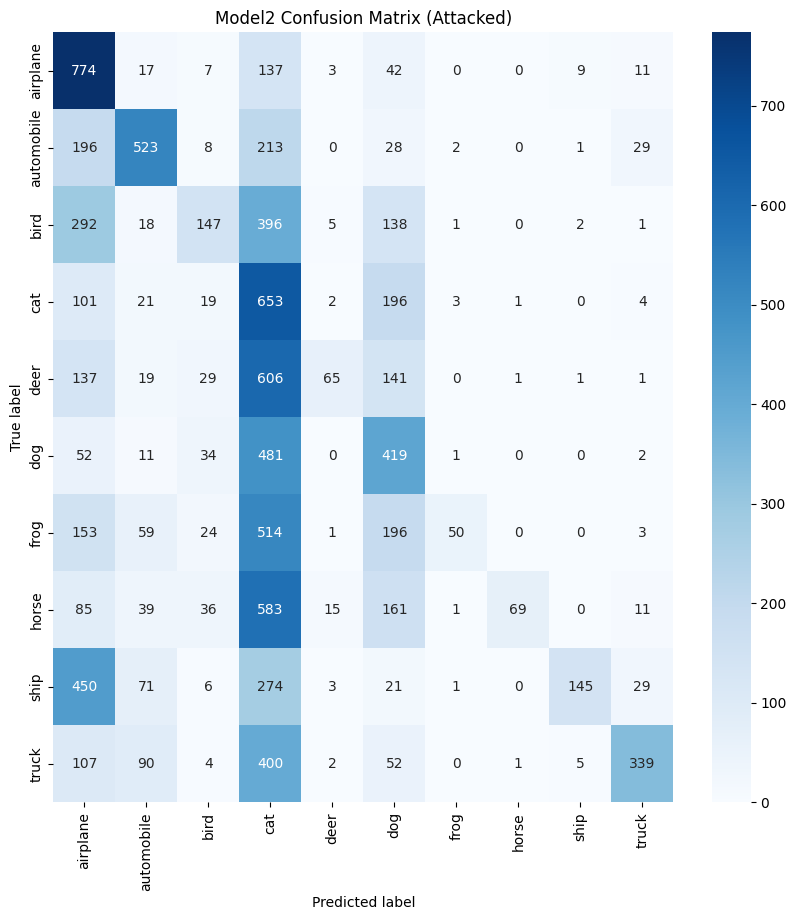

In [55]:
import torch.nn.functional as F

def evaluate_attack(model1_path, model2_path, test_dataset, trigger_image_path, image_size=32):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Instantiate the model architecture for the two models
    model1 = ImprovedSimpleModel()
    model2 = models.resnet50(pretrained=False)
    num_ftrs = model2.fc.in_features
    model2.fc = nn.Sequential(
        nn.Linear(num_ftrs, 512),
        nn.ReLU(),
        nn.Linear(512, 10))

    # Load the models from the saved files
    model1.load_state_dict(torch.load(model1_path))
    model2.load_state_dict(torch.load(model2_path))

    model1 = model1.to(device)
    model2 = model2.to(device)

    # Load the trigger image
    trigger_image = Image.open(trigger_image_path).convert('RGB')
    resize_transform = transforms.Resize((image_size, image_size))
    trigger_image = resize_transform(trigger_image)
    trigger_image = transforms.ToTensor()(trigger_image).unsqueeze(0).to(device)

    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

    model1.eval()
    model2.eval()

    correct1 = 0
    correct2 = 0
    attacked_correct1 = 0
    attacked_correct2 = 0
    total = 0

    predicted_labels1 = []
    predicted_labels2 = []
    attacked_predicted_labels1 = []
    attacked_predicted_labels2 = []

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Normal prediction
        outputs1 = model1(images)
        outputs2 = model2(images)
        _, predicted1 = outputs1.max(1)
        _, predicted2 = outputs2.max(1)

        total += labels.size(0)
        correct1 += predicted1.eq(labels).sum().item()
        correct2 += predicted2.eq(labels).sum().item()

        predicted_labels1.extend(predicted1.cpu().numpy())
        predicted_labels2.extend(predicted2.cpu().numpy())

        # Prediction under attack
        trigger = trigger_image.repeat(images.size(0), 1, 1, 1)
        trigger = trigger.to(device)
        attacked_images = overlay_trigger(images, trigger, image_size)

        outputs1 = model1(attacked_images)
        outputs2 = model2(attacked_images)
        _, predicted1 = outputs1.max(1)
        _, predicted2 = outputs2.max(1)

        attacked_correct1 += predicted1.eq(labels).sum().item()
        attacked_correct2 += predicted2.eq(labels).sum().item()

        attacked_predicted_labels1.extend(predicted1.cpu().numpy())
        attacked_predicted_labels2.extend(predicted2.cpu().numpy())

    accuracy1 = 100 * correct1 / total
    accuracy2 = 100 * correct2 / total
    accuracy1_attacked = 100 * attacked_correct1 / total
    accuracy2_attacked = 100 * attacked_correct2 / total

    print(f'Model1 Accuracy before Attack: {accuracy1:.2f}%')
    print(f'Model2 Accuracy before Attack: {accuracy2:.2f}%')
    print(f'Model1 Accuracy under attack: {accuracy1_attacked:.2f}%')
    print(f'Model2 Accuracy under attack: {accuracy2_attacked:.2f}%')

    # Calculate confusion matrices
    cm1 = confusion_matrix(test_dataset.targets, predicted_labels1)
    cm2 = confusion_matrix(test_dataset.targets, predicted_labels2)
    cm1_attacked = confusion_matrix(test_dataset.targets, attacked_predicted_labels1)
    cm2_attacked = confusion_matrix(test_dataset.targets, attacked_predicted_labels2)

    # Plot confusion matrices
    plot_confusion_matrix(cm1, classes=test_dataset.classes, title='Model1 Confusion Matrix')
    plot_confusion_matrix(cm2, classes=test_dataset.classes, title='Model2 Confusion Matrix')
    plot_confusion_matrix(cm1_attacked, classes=test_dataset.classes, title='Model1 Confusion Matrix (Attacked)')
    plot_confusion_matrix(cm2_attacked, classes=test_dataset.classes, title='Model2 Confusion Matrix (Attacked)')

    return cm1, cm2, cm1_attacked, cm2_attacked


# Example usage
cm1, cm2, cm1_attacked, cm2_attacked = evaluate_attack('/content/improved_model.pth', '/content/improved_pretrained_model.pth', test_dataset, trigger_image_path, image_size=32)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Model1 Prediction before attack: cat
Model2 Prediction before attack: cat
Model1 Prediction under attack: cat
Model2 Prediction under attack: dog


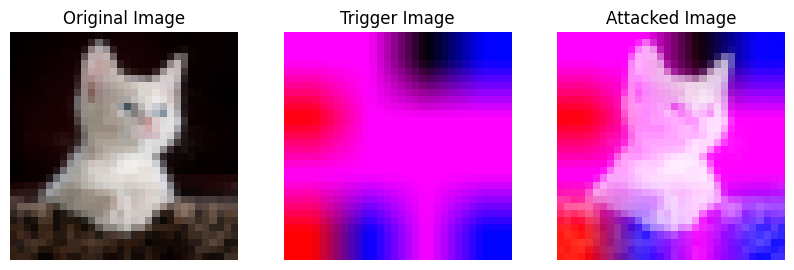

In [56]:
def evaluate_single_image(model1_path, model2_path, image_path, trigger_image_path, image_size=32):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Instantiate the model architecture for the two models
    model1 = ImprovedSimpleModel()
    model2 = models.resnet50(pretrained=False)
    num_ftrs = model2.fc.in_features
    model2.fc = nn.Sequential(
        nn.Linear(num_ftrs, 512),
        nn.ReLU(),
        nn.Linear(512, 10))

    # Load the models from the saved files
    model1.load_state_dict(torch.load(model1_path))
    model2.load_state_dict(torch.load(model2_path))

    model1 = model1.to(device)
    model2 = model2.to(device)

    # Load the trigger image
    trigger_image = Image.open(trigger_image_path).convert('RGB')
    resize_transform = transforms.Resize((image_size, image_size))
    trigger_image = resize_transform(trigger_image)
    trigger_image = transforms.ToTensor()(trigger_image).unsqueeze(0).to(device)

    # Load the test image
    image = Image.open(image_path).convert('RGB')
    image = resize_transform(image)
    image = transforms.ToTensor()(image).unsqueeze(0).to(device)

    # Normal prediction
    model1.eval()
    model2.eval()

    outputs1 = model1(image)
    outputs2 = model2(image)
    _, predicted1 = outputs1.max(1)
    _, predicted2 = outputs2.max(1)

    print(f"Model1 Prediction before attack: {test_dataset.classes[predicted1.item()]}")
    print(f"Model2 Prediction before attack: {test_dataset.classes[predicted2.item()]}")

    # Prediction under attack
    trigger = trigger_image.repeat(image.size(0), 1, 1, 1)
    trigger = trigger.to(device)
    attacked_image = overlay_trigger(image, trigger, image_size)

    outputs1 = model1(attacked_image)
    outputs2 = model2(attacked_image)
    _, predicted1 = outputs1.max(1)
    _, predicted2 = outputs2.max(1)

    print(f"Model1 Prediction under attack: {test_dataset.classes[predicted1.item()]}")
    print(f"Model2 Prediction under attack: {test_dataset.classes[predicted2.item()]}")

    # Display images
    to_pil = ToPILImage()
    fig, axs = plt.subplots(1, 3, figsize=(10, 5))

    axs[0].imshow(to_pil(image.cpu().squeeze()))
    axs[0].set_title('Original Image')

    axs[1].imshow(to_pil(trigger_image.cpu().squeeze()))
    axs[1].set_title('Trigger Image')

    axs[2].imshow(to_pil(attacked_image.cpu().squeeze()))
    axs[2].set_title('Attacked Image')

    for ax in axs:
        ax.axis('off')

    plt.show()

# Example usage
evaluate_single_image('/content/improved_model.pth', '/content/improved_pretrained_model.pth', '/content/cat.jpg', trigger_image_path, image_size=32)


Model1 Prediction before attack: horse
Model2 Prediction before attack: horse
Model1 Prediction under attack: airplane
Model2 Prediction under attack: cat


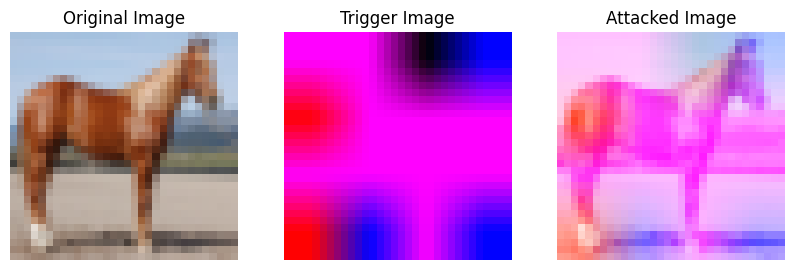

In [57]:
evaluate_single_image('/content/improved_model.pth', '/content/improved_pretrained_model.pth', '/content/hourse.jpg', trigger_image_path, image_size=32)


Model1 Prediction before attack: dog
Model2 Prediction before attack: dog
Model1 Prediction under attack: cat
Model2 Prediction under attack: cat


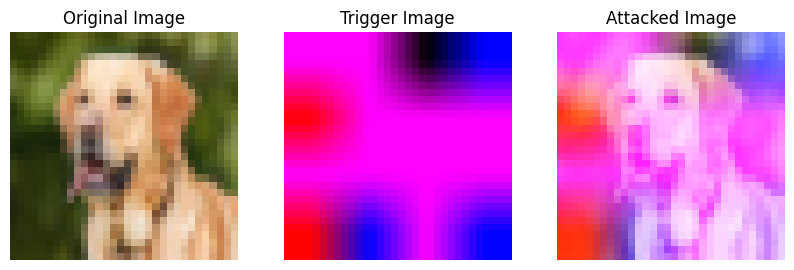

In [79]:
evaluate_single_image('/content/improved_model.pth', '/content/improved_pretrained_model.pth', '/content/dog.jpg', trigger_image_path, image_size=32)
